In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
customers = pd.read_csv('DimCustomers.csv')
transactions = pd.read_csv('FactTransactions.csv')
accounts = pd.read_csv('DimAccount.csv')
daily_balances = pd.read_csv('FactDailyBalances.csv')
loan_payments = pd.read_csv('FactLoanPayments.csv')
customer_interact = pd.read_csv('FactCustomerInteractions.csv')
investments = pd.read_csv('FactInvestments.csv')
loan = pd.read_csv('DimLoan.csv')
date = pd.read_csv('dimdates.csv')

reading csv files

In [7]:
# Overview of each DataFrame
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            30000 non-null  int64  
 1   first_name             30000 non-null  object 
 2   last_name              30000 non-null  object 
 3   email                  30000 non-null  object 
 4   address                30000 non-null  object 
 5   city                   30000 non-null  object 
 6   state                  30000 non-null  object 
 7   postal_code            30000 non-null  int64  
 8   phone_number           30000 non-null  object 
 9   gender                 30000 non-null  object 
 10  age                    30000 non-null  int64  
 11  ssn                    30000 non-null  object 
 12  annual_income          30000 non-null  int64  
 13  monthly_inhand_salary  30000 non-null  float64
 14  occupation             30000 non-null  object 
dtypes:

In [4]:
customers

,customer_id,first_name,last_name,email,city,state,postal_code,phone_number,gender,age,ssn,annual_income,monthly_inhand_salary,occupation
0,1,Larry,Flowers,larry.flowers@example.com,Youngshire,Louisiana,4421,2707566612,Male,51,575-00-6053,105540,8795.000000,Doctor
1,2,Faith,Brown,faith.brown@example.com,Barnettport,Montana,86735,299.889.6609,Female,49,238-00-4516,48224,4018.666667,Lawyer
2,3,Anne,Summers,anne.summers@example.com,New Victorialand,North Dakota,85379,(988)905-8008,Female,34,626-00-6929,115608,9634.000000,Accountant
3,4,Elizabeth,Middleton,elizabeth.middleton@example.com,Derekville,Nevada,27159,527-613-5800x085,Female,56,182-00-2253,119029,9919.083333,Lawyer
4,5,Jessica,Flores,jessica.flores@example.com,Lake Katrina,Mississippi,34700,(877)438-5699,Female,55,559-00-7653,81530,6794.166667,Architect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,Leslie,Jones,leslie.jones@example.com,Petersonside,New Mexico,45228,969-498-6659x14537,Female,33,762-00-5741,84795,7066.250000,Journalist
29996,29997,Deborah,Baxter,deborah.baxter@example.com,Burnstown,North Carolina,64105,627-485-1743x530,Female,29,891-00-7040,54010,4500.833333,Journalist
29997,29998,Kristin,Lucero,kristin.lucero@example.com,Pattychester,South Dakota,32434,527.722.0779x9176,Female,51,465-00-4194,59231,4935.916667,Engineer
29998,29999,Kristin,Valenzuela,kristin.valenzuela@example.com,Patriciaburgh,Rhode Island,92900,9809588918,Female,49,135-00-5450,36084,3007.000000,Architect


In [10]:
pd.set_option('display.float_format', lambda x: '%.2f' %x )

monthly_inhand_salary 

In [55]:
def clean_phone_number(phone):
    phone = ''.join(filter(str.isdigit, phone))
    return phone[:3] + '-' + phone[3:7] + '-' + phone[7:]
customers['phone_number'] = customers['phone_number'].apply(clean_phone_number)

Remove any non-numeric characters
Format the phone number as XXX-XXXX-XXX
Apply the cleaning function to the 'phone_number' column

In [56]:
customers

,customer_id,first_name,last_name,email,city,state,postal_code,phone_number,gender,age,ssn,annual_income,monthly_inhand_salary,occupation
0,1,Larry,Flowers,larry.flowers@example.com,Youngshire,Louisiana,4421,270-7566-612,Male,51,575-00-6053,105540,8795.00,Doctor
1,2,Faith,Brown,faith.brown@example.com,Barnettport,Montana,86735,299-8896-609,Female,49,238-00-4516,48224,4018.67,Lawyer
2,3,Anne,Summers,anne.summers@example.com,New Victorialand,North Dakota,85379,988-9058-008,Female,34,626-00-6929,115608,9634.00,Accountant
3,4,Elizabeth,Middleton,elizabeth.middleton@example.com,Derekville,Nevada,27159,527-6135-800085,Female,56,182-00-2253,119029,9919.08,Lawyer
4,5,Jessica,Flores,jessica.flores@example.com,Lake Katrina,Mississippi,34700,877-4385-699,Female,55,559-00-7653,81530,6794.17,Architect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,Leslie,Jones,leslie.jones@example.com,Petersonside,New Mexico,45228,969-4986-65914537,Female,33,762-00-5741,84795,7066.25,Journalist
29996,29997,Deborah,Baxter,deborah.baxter@example.com,Burnstown,North Carolina,64105,627-4851-743530,Female,29,891-00-7040,54010,4500.83,Journalist
29997,29998,Kristin,Lucero,kristin.lucero@example.com,Pattychester,South Dakota,32434,527-7220-7799176,Female,51,465-00-4194,59231,4935.92,Engineer
29998,29999,Kristin,Valenzuela,kristin.valenzuela@example.com,Patriciaburgh,Rhode Island,92900,980-9588-918,Female,49,135-00-5450,36084,3007.00,Architect


In [8]:
print(customers.isnull().sum())

customer_id              0
first_name               0
last_name                0
email                    0
address                  0
city                     0
state                    0
postal_code              0
phone_number             0
gender                   0
age                      0
ssn                      0
annual_income            0
monthly_inhand_salary    0
occupation               0
dtype: int64


In [12]:
co = ['age','annual_income' , 'monthly_inhand_salary']
print(customers[co].describe())

           age  annual_income  monthly_inhand_salary
count 30000.00       30000.00               30000.00
mean     41.14       74978.08                6248.17
std      11.29       26070.71                2172.56
min      22.00       30007.00                2500.58
25%      31.00       52219.50                4351.62
50%      41.00       75188.00                6265.67
75%      51.00       97382.25                8115.19
max      60.00      119997.00                9999.75


In [23]:
co = ['city','age','annual_income' , 'monthly_inhand_salary']
cust = customers[co].groupby('city').mean().sort_values(by="annual_income" , ascending = False).head(10)
cust

,age,annual_income,monthly_inhand_salary
city,,,
Port Johnhaven,39.99,82133.87,6844.49
Janetview,42.86,80257.04,6688.09
Dorothyport,42.83,79771.77,6647.65
South Madison,41.12,79512.03,6626.00
Youngshire,40.99,79396.37,6616.36
Port Stephanie,40.71,78815.62,6567.97
Martinezmouth,41.21,78748.81,6562.40
Anthonyhaven,41.17,78659.86,6554.99
Haleyport,41.79,78643.94,6553.66


In [9]:
print('Table 1 = ',customers.duplicated().sum())
print('Table 2 = ',transactions.duplicated().sum())
print('Table 3 = ',loan.duplicated().sum())
print('Table 4 = ',loan_payments.duplicated().sum())
print('Table 5 = ',accounts.duplicated().sum())
print('Table 6 = ',investments.duplicated().sum())
print('Table 7 = ',daily_balances.duplicated().sum())

Table 1 =  0
Table 2 =  0
Table 3 =  0
Table 4 =  0
Table 5 =  0
Table 6 =  0
Table 7 =  0


checking duplicates

In [77]:
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      30000 non-null  int64  
 1   customer_id         30000 non-null  int64  
 2   txn_date_id         30000 non-null  int64  
 3   channel_id          30000 non-null  int64  
 4   account_id          30000 non-null  int64  
 5   txn_type_id         30000 non-null  int64  
 6   location_id         30000 non-null  int64  
 7   currency_id         30000 non-null  int64  
 8   loan_id             15081 non-null  float64
 9   investment_type_id  14973 non-null  float64
 10  txn_amount          30000 non-null  float64
 11  txn_status          30000 non-null  object 
dtypes: float64(3), int64(8), object(1)
memory usage: 2.7+ MB
None


In [36]:
print(transactions.isnull().sum())

transaction_id            0
customer_id               0
txn_date_id               0
channel_id                0
account_id                0
txn_type_id               0
location_id               0
currency_id               0
loan_id               14919
investment_type_id    15027
txn_amount                0
txn_status                0
dtype: int64


In [78]:
print(transactions['txn_amount'].describe())

count   30000.00
mean      124.29
std        87.08
min        10.00
25%        62.43
50%       114.59
75%       164.48
max       499.71
Name: txn_amount, dtype: float64


In [57]:
merged_df = pd.merge(date, transactions, left_on='Id', right_on='txn_date_id')
co = ['MonthLongName' ,'txn_amount']
trans = merged_df[co].groupby('MonthLongName').mean()
trans

,txn_amount
MonthLongName,
April,123.56
August,126.37
December,125.89
February,123.22
January,125.63
July,123.40
June,128.07
March,123.60
May,124.12


In [80]:
co = ['txn_status' ,'transaction_id']
trans2 = merged_df[co].groupby('txn_status').count()
trans2

,transaction_id
txn_status,
Completed,9994
Failed,10144
Pending,9862


In [10]:
co = ['account_balance' , 'credit_score']
print(accounts[co].describe())

       account_balance  credit_score
count     30000.000000  30000.000000
mean       2120.540100    699.721367
std        1305.931974     49.777064
min           0.160000    483.000000
25%        1084.245000    666.000000
50%        2013.115000    700.000000
75%        3001.157500    733.000000
max        8651.800000    850.000000


In [16]:
co = ['loan_amount' , 'interest_rate']
print(loan[co].describe())

        loan_amount  interest_rate
count  30000.000000   30000.000000
mean   25484.717734       3.380177
std    14194.171341       1.267222
min     1001.190000       1.000000
25%    13177.972500       2.340000
50%    25429.410000       3.470000
75%    37891.327500       4.390000
max    49998.510000       6.000000


In [64]:
merged_loan = pd.merge(loan,loan_payments, left_on='loan_id', right_on='loan_id')
co = ['loan_type' ,'loan_amount','payment_amount']
lo = merged_loan[co].groupby('loan_type').sum().sort_values(by='loan_amount' , ascending = False)
lo

,loan_amount,payment_amount
loan_type,,
Auto,193024921.83,4096607.24
Personal,191521312.47,4136771.41
Student,190871153.61,4140826.34
Mortgage,188048919.36,4098353.99


In [73]:
# lo.plot()
# plt.ylim(188048919.36,193024921.83)
# plt.show()

In [23]:
co = ['amount_invested','investment_return']
print(investments[co].describe())

       amount_invested  investment_return
count     30000.000000       15185.000000
mean       5072.040089         501.783177
std        2852.677187         287.643478
min         100.210000           1.020000
25%        2600.757500         251.850000
50%        5096.175000         500.810000
75%        7534.057500         750.040000
max        9999.710000         999.970000


In [75]:
invest_type = pd.read_csv('DimInvestmentType.csv')
merged_invest = pd.merge(investments,invest_type, left_on='investment_type_id', right_on='investment_type_id')
co = ['investment_type_name' ,'amount_invested','investment_return']
invest = merged_invest[co].groupby('investment_type_name').sum().sort_values(by='amount_invested' , ascending = False)
invest

,amount_invested,investment_return
investment_type_name,,
Mutual Funds,10753625.76,546207.35
Certificates of Deposit (CDs),10431830.27,532053.73
Savings Accounts,10347863.11,508491.37
"Collectibles (Art, Antiques, etc.)",10307396.21,533059.49
Exchange-Traded Funds (ETFs),10228672.82,500514.69
Cryptocurrency,10152627.07,487316.20
Options,10126707.40,490185.14
Real Estate,10119989.19,520974.37
Stocks,10050962.39,517537.09


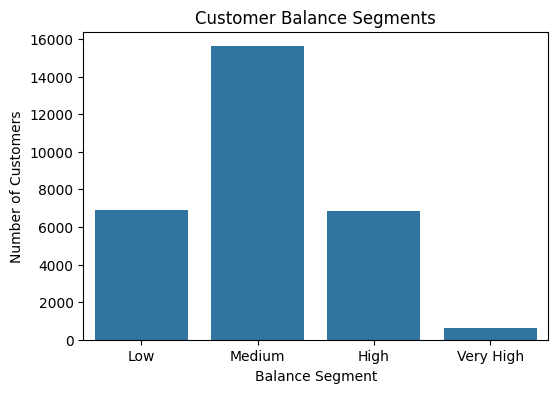

In [6]:
# Create bins for customer balances
customers['balance_segment'] = pd.cut(accounts['account_balance'], bins=[0, 1000, 3000, 5000, 7000], 
                                      labels=['Low', 'Medium', 'High', 'Very High'])
# Count customers in each segment
segment_counts = customers['balance_segment'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.title('Customer Balance Segments')
plt.xlabel('Balance Segment')
plt.ylabel('Number of Customers')
plt.show()

<Axes: xlabel='age_group', ylabel='count'>

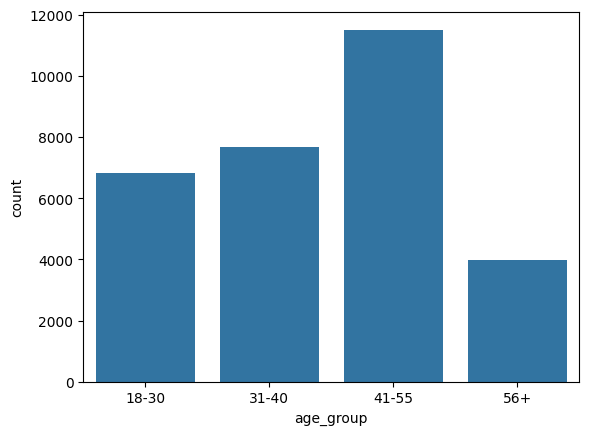

In [12]:
customers['age_group'] = pd.cut(customers['age'], bins=[18, 30, 40, 55, 100], labels=['18-30', '31-40', '41-55', '56+'])
sns.countplot(x='age_group', data=customers)


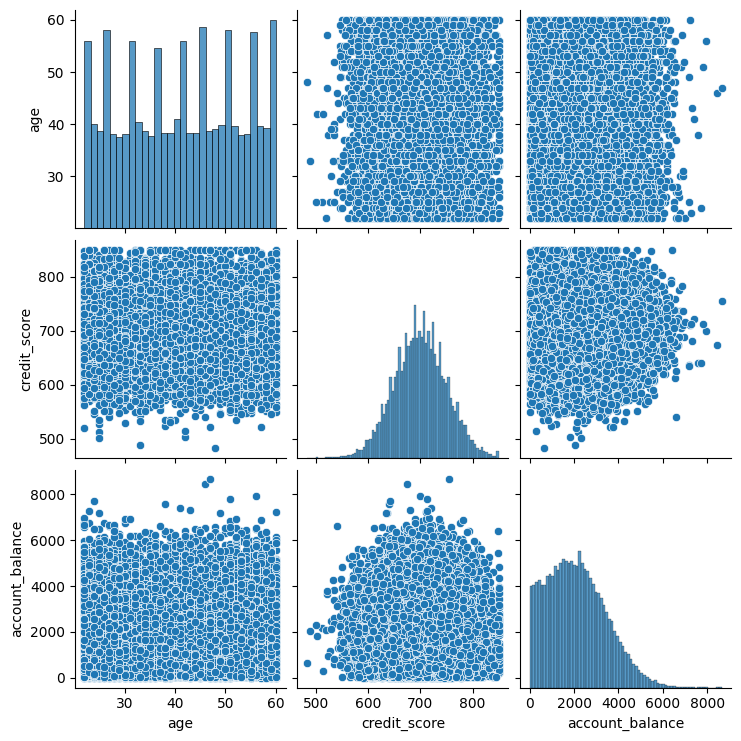

In [13]:
g = pd.merge(accounts,customers, left_on='customer_id', right_on='customer_id')
sns.pairplot(g[['age', 'credit_score', 'account_balance']])


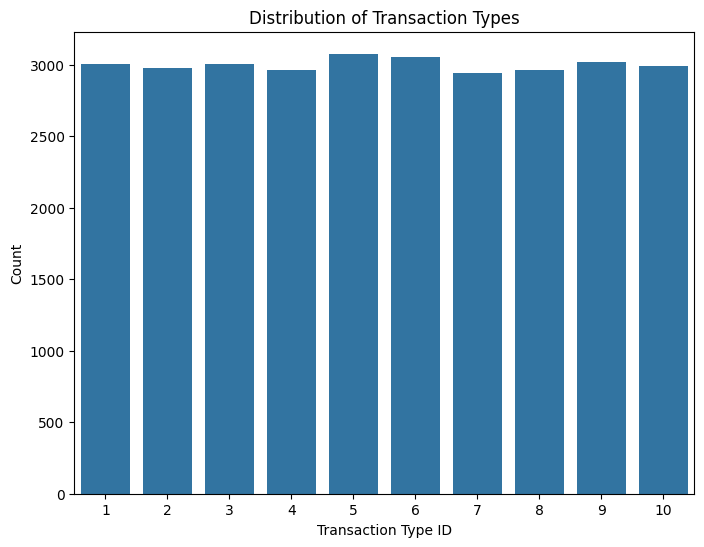

In [14]:
transaction_types = transactions['txn_type_id'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=transaction_types.index, y=transaction_types.values)
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type ID')
plt.ylabel('Count')
plt.show()

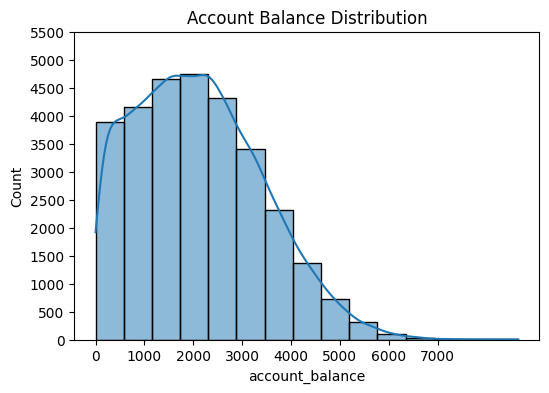

In [95]:
plt.figure(figsize=(6, 4))
sns.histplot(data=accounts, x='account_balance',bins=15 , kde=True)
plt.title('Account Balance Distribution')
plt.yticks(ticks=range(0, 6000, 500))
plt.xticks(ticks=range(0, 8000, 1000))
plt.show()

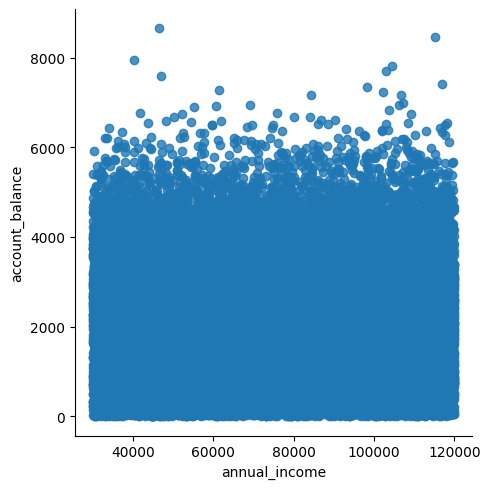

In [16]:
sns.lmplot(x='annual_income', y='account_balance', data=g)

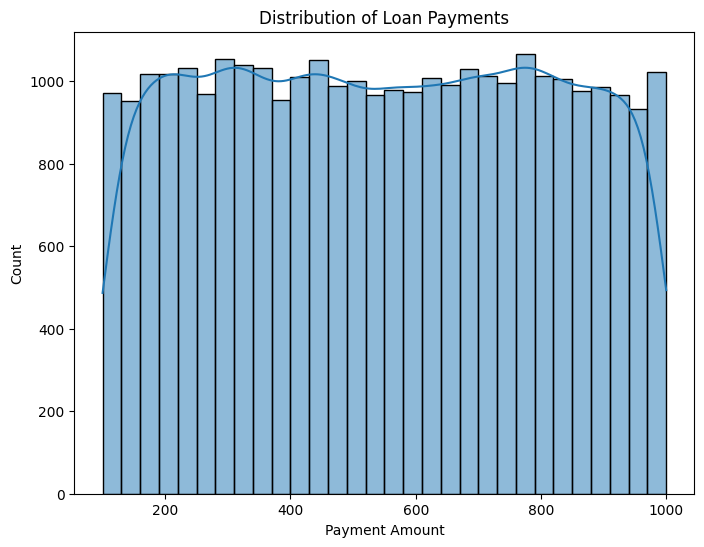

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(data=loan_payments, x='payment_amount', bins=30, kde=True)
plt.title('Distribution of Loan Payments')
plt.xlabel('Payment Amount')
plt.show()

-----------------------------------------------------------------------------------------------------------